In [1]:
%matplotlib inline
import os, sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import f1_score, classification_report, confusion_matrix, make_scorer
from sklearn.preprocessing import OneHotEncoder
import keras
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import SGD
from keras import regularizers
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from keras import backend as K
import tensorflow as tf

Using TensorFlow backend.


In [2]:
np.finfo(np.float32).eps, np.sqrt(np.finfo(np.float32).eps), np.power(np.finfo(np.float32).eps, 0.7)

(1.1920929e-07, 0.00034526698, 1.4236953606213502e-05)

In [3]:
np.finfo(np.float64).eps, np.sqrt(np.finfo(np.float64).eps)

(2.220446049250313e-16, 1.4901161193847656e-08)

In [4]:
sys.path.append('/home/admin/github/wordroid.sblo.jp/lib')
from keras_ex.gkernel import GaussianKernel, GaussianKernel2, GaussianKernel3
from keras_ex.gkernel.sklearn import (
    RBFClassifier, RBFRegressor,
    make_model_gkernel3,
    make_model_gkernel2,
    make_model_gkernel1,
    make_model_out,
    make_model
)

In [5]:
iris = datasets.load_iris()
X = iris.data.astype(np.float32)
Y = iris.target
N = Y.size
Y2 = keras.utils.to_categorical(Y, num_classes=3)

index = np.arange(N)
xtrain = X[index[index % 2 != 0],:]
ytrain = Y2[index[index % 2 != 0]]
xtest = X[index[index % 2 == 0],:]
yans = Y2[index[index % 2 == 0]]

In [6]:
#lm, model_gkernel = make_model_gkernel2()
lm, model_gkernel = make_model_gkernel3()
print(model_gkernel.inputs[0])
model_gkernel.summary()

W1005 21:32:11.999155 139754885134144 deprecation_wrapper.py:119] From /home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1005 21:32:12.039187 139754885134144 deprecation_wrapper.py:119] From /home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1005 21:32:12.055512 139754885134144 deprecation_wrapper.py:119] From /home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W1005 21:32:12.056576 139754885134144 deprecation_wrapper.py:119] From /home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. P

Tensor("inp:0", shape=(?, 4), dtype=float32)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inp (InputLayer)             (None, 4)                 0         
_________________________________________________________________
gkernel (GaussianKernel3)    (None, 2)                 9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [7]:
model_out = make_model_out()
model_out.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inp (InputLayer)             (None, 2)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [8]:
model = make_model(nn=4, num_cls=3, make_model_gkernel=make_model_gkernel3)
model.summary()

W1005 21:32:12.304886 139754885134144 deprecation_wrapper.py:119] From /home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inp (InputLayer)             (None, 4)                 0         
_________________________________________________________________
model_gkernel (Model)        (None, 2)                 9         
_________________________________________________________________
model_out (Model)            (None, 3)                 9         
Total params: 18
Trainable params: 9
Non-trainable params: 9
_________________________________________________________________


In [9]:
model.fit(xtrain, ytrain, epochs=5, verbose=2)

W1005 21:32:12.440752 139754885134144 deprecation.py:323] From /home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/5
 - 0s - loss: 1.1013 - acc: 0.1467
Epoch 2/5
 - 0s - loss: 1.1010 - acc: 0.3200
Epoch 3/5
 - 0s - loss: 1.0988 - acc: 0.3333
Epoch 4/5
 - 0s - loss: 1.0993 - acc: 0.3333
Epoch 5/5
 - 0s - loss: 1.0992 - acc: 0.3333


In [10]:
pred = model.predict(xtrain)
pred[:5]

array([[0.35406977, 0.33023432, 0.31569588],
       [0.354507  , 0.3296462 , 0.31584674],
       [0.35345706, 0.33106634, 0.3154766 ],
       [0.35369274, 0.3307465 , 0.31556073],
       [0.35395348, 0.33039725, 0.3156493 ]], dtype=float32)

In [11]:
np.random.choice(np.arange(xtrain.shape[0]), 3)

array([55, 68, 40])

In [12]:
model.save('saved_model')

In [13]:
ls -la

合計 5744
drwxrwxr-x. 3 admin admin    4096 10月  5 21:32 ./
drwxrwxr-x. 7 admin admin    4096  9月 16 10:46 ../
drwxr-xr-x. 2 admin admin    4096 10月  5 16:37 .ipynb_checkpoints/
-rw-rw-r--. 1 admin admin 1030536 10月  5 21:31 dev_001-iris.ipynb
-rw-rw-r--. 1 admin admin  306244 10月  4 22:56 dev_002-digits8.ipynb
-rw-rw-r--. 1 admin admin 2211741 10月  5 16:23 dev_003-moon.ipynb
-rw-rw-r--. 1 admin admin 1518470 10月  5 16:26 dev_004-moon2.ipynb
-rw-rw-r--. 1 admin admin  156335 10月  4 22:56 dev_005-digits28.ipynb
-rw-rw-r--. 1 admin admin  562555 10月  5 07:48 iris-landmark_example.ipynb
-rw-rw-r--. 1 admin admin   23772 10月  5 17:06 iris-make_model_example.ipynb
-rw-rw-r--. 1 admin admin   21494 10月  5 08:43 iris-session_clear_example.ipynb
-rw-rw-r--. 1 admin admin   21904 10月  5 21:32 saved_model


In [14]:
from keras.models import load_model

In [15]:
# load_model('saved_model', custom_objects={'GaussianKernel2': GaussianKernel2})
m = load_model('saved_model', custom_objects={'GaussianKernel3': GaussianKernel3})

/home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/keras/engine/saving.py:327: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [16]:
pred = m.predict(xtrain)
pred[:5]

array([[0.35406977, 0.33023432, 0.31569588],
       [0.354507  , 0.3296462 , 0.31584674],
       [0.35345706, 0.33106634, 0.3154766 ],
       [0.35369274, 0.3307465 , 0.31556073],
       [0.35395348, 0.33039725, 0.3156493 ]], dtype=float32)

## Getting Started

In [17]:
'''
number of landmarks is 15
'''
clf = RBFClassifier(
    num_lm=15,
    lm_select_from_x=True
)

In [18]:
%%time
#hst = clf.fit(xtrain, ytrain, epochs=500, batch_size=256, verbose=0)
hst = clf.fit(xtrain, ytrain, epochs=200, verbose=0)

CPU times: user 4.57 s, sys: 131 ms, total: 4.7 s
Wall time: 3.95 s


In [19]:
clf.sk_params

{'callbacks': None,
 'epochs_warmup': 10,
 'lm': None,
 'lm_select_from_x': True,
 'loss': None,
 'lr': None,
 'nn': None,
 'num_cls': 3,
 'num_lm': 15}

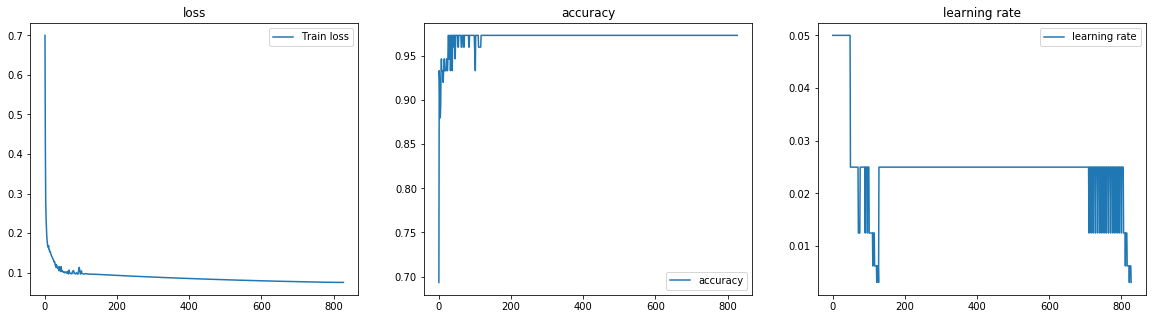

In [20]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [21]:
'''
trained gamma
'''
clf.current_gamma()

0.10856005

In [22]:
'''
fixed landmarks
'''
lm = clf.current_lm()
lm

array([[5.2, 2.7, 3.9, 1.4],
       [5.7, 2.8, 4.1, 1.3],
       [4.7, 3.2, 1.6, 0.2],
       [5.5, 2.5, 4. , 1.3],
       [6.8, 3.2, 5.9, 2.3],
       [4.6, 3.2, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [7.2, 3.6, 6.1, 2.5],
       [7.9, 3.8, 6.4, 2. ],
       [6.2, 2.9, 4.3, 1.3],
       [6.7, 3.1, 4.4, 1.4],
       [5.7, 4.4, 1.5, 0.4],
       [7.7, 3. , 6.1, 2.3],
       [5.5, 4.2, 1.4, 0.2],
       [5.7, 3. , 4.2, 1.2]], dtype=float32)

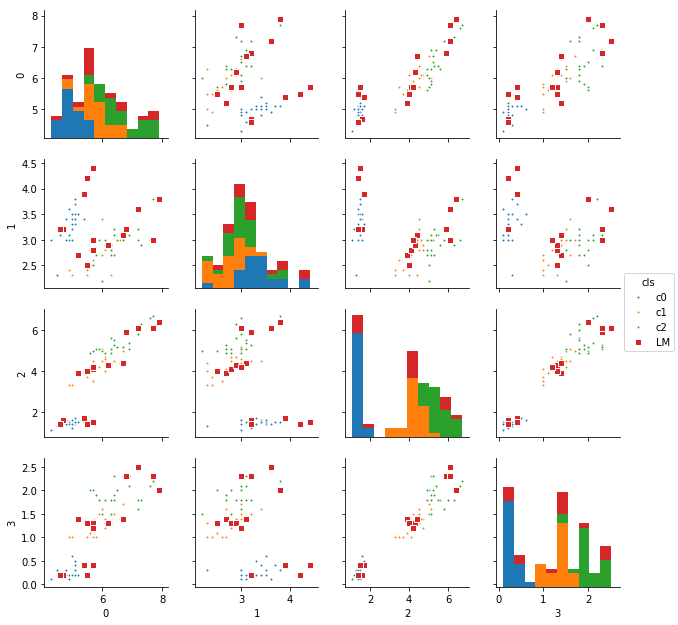

In [23]:
df = pd.DataFrame(np.r_[xtrain, lm])
df['cls'] = ['c'+str(ee) for ee in np.argmax(ytrain, axis=1)] + ['LM']*lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['.']*3+['s'], hue='cls', size=2.2, diag_kind='hist')

In [24]:
clf.predict_proba(xtest)[:5]

array([[9.9998677e-01, 1.3214793e-05, 7.5552735e-22],
       [9.9999297e-01, 7.0174501e-06, 1.1298659e-20],
       [9.9999034e-01, 9.6106278e-06, 4.8111695e-22],
       [9.9999130e-01, 8.6494447e-06, 7.2833277e-21],
       [9.9998665e-01, 1.3323912e-05, 1.0929693e-18]], dtype=float32)

In [25]:
pred = clf.predict(xtrain)
pred[:5]

array([0, 0, 0, 0, 0])

In [26]:
print('F1_SCORE :', f1_score(np.argmax(ytrain, axis=1), pred, average='macro'))
print(classification_report(np.argmax(ytrain, axis=1), pred))
print(confusion_matrix(np.argmax(ytrain, axis=1), pred))

F1_SCORE : 0.9732905982905983
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      0.92      0.96        25
           2       0.93      1.00      0.96        25

   micro avg       0.97      0.97      0.97        75
   macro avg       0.98      0.97      0.97        75
weighted avg       0.98      0.97      0.97        75

[[25  0  0]
 [ 0 23  2]
 [ 0  0 25]]


In [27]:
pred_test = clf.predict(xtest)

In [28]:
print('F1_SCORE :', f1_score(np.argmax(yans, axis=1), pred_test, average='macro'))
print(classification_report(np.argmax(yans, axis=1), pred_test))
print(confusion_matrix(np.argmax(yans, axis=1), pred_test))

F1_SCORE : 0.9599839935974389
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.92      0.96      0.94        25
           2       0.96      0.92      0.94        25

   micro avg       0.96      0.96      0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75

[[25  0  0]
 [ 0 24  1]
 [ 0  2 23]]


## set landmarks on input x

In [29]:
clf = RBFClassifier(
    num_lm=3,
    lm=xtrain[:3]
)

In [30]:
%%time
#hst = clf.fit(xtrain, ytrain, epochs=500, batch_size=256, verbose=0)
hst = clf.fit(xtrain, ytrain, epochs=200, verbose=0)

CPU times: user 5.21 s, sys: 135 ms, total: 5.34 s
Wall time: 4.47 s


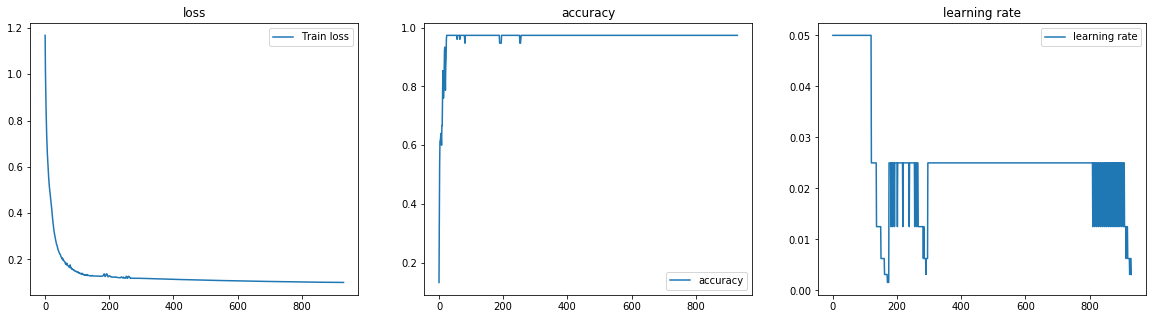

In [31]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [32]:
'''
trained gamma
'''
clf.current_gamma()

0.13729188

In [33]:
'''
fixed landmarks
'''
lm = clf.current_lm()
lm

array([[4.9, 3. , 1.4, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5.4, 3.9, 1.7, 0.4]], dtype=float32)

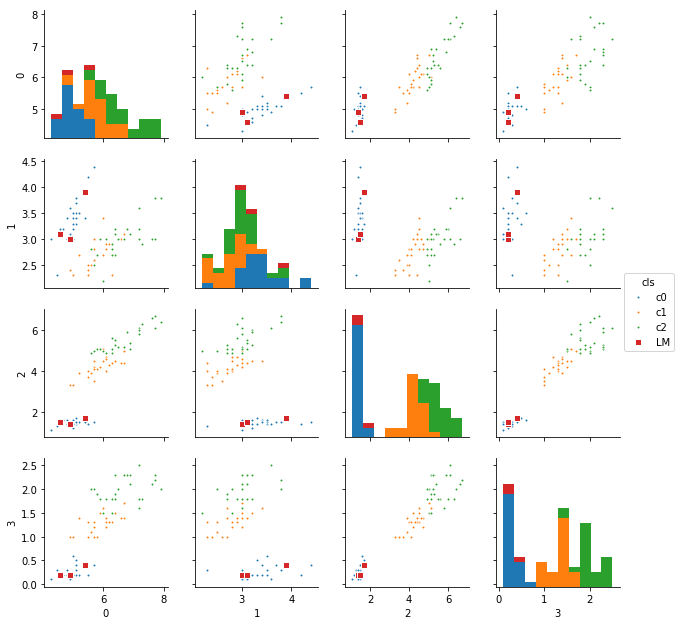

In [34]:
df = pd.DataFrame(np.r_[xtrain, lm])
df['cls'] = ['c'+str(ee) for ee in np.argmax(ytrain, axis=1)] + ['LM']*lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['.']*3+['s'], hue='cls', size=2.2, diag_kind='hist')

In [35]:
clf.predict_proba(xtest)[:5]

array([[9.9753916e-01, 2.4608581e-03, 1.3145684e-19],
       [9.9726605e-01, 2.7339282e-03, 2.9451321e-19],
       [9.9737620e-01, 2.6237620e-03, 1.6454839e-19],
       [9.9712270e-01, 2.8773150e-03, 3.2328839e-19],
       [9.9405223e-01, 5.9477524e-03, 5.9349129e-18]], dtype=float32)

In [36]:
pred = clf.predict(xtrain)
pred[:5]

array([0, 0, 0, 0, 0])

In [37]:
print('F1_SCORE :', f1_score(np.argmax(ytrain, axis=1), pred, average='macro'))
print(classification_report(np.argmax(ytrain, axis=1), pred))
print(confusion_matrix(np.argmax(ytrain, axis=1), pred))

F1_SCORE : 0.9732905982905983
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      0.92      0.96        25
           2       0.93      1.00      0.96        25

   micro avg       0.97      0.97      0.97        75
   macro avg       0.98      0.97      0.97        75
weighted avg       0.98      0.97      0.97        75

[[25  0  0]
 [ 0 23  2]
 [ 0  0 25]]


In [38]:
pred_test = clf.predict(xtest)

In [39]:
print('F1_SCORE :', f1_score(np.argmax(yans, axis=1), pred_test, average='macro'))
print(classification_report(np.argmax(yans, axis=1), pred_test))
print(confusion_matrix(np.argmax(yans, axis=1), pred_test))

F1_SCORE : 0.9198717948717948
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.91      0.84      0.87        25
           2       0.85      0.92      0.88        25

   micro avg       0.92      0.92      0.92        75
   macro avg       0.92      0.92      0.92        75
weighted avg       0.92      0.92      0.92        75

[[25  0  0]
 [ 0 21  4]
 [ 0  2 23]]


## set landmarks on input x randomly

In [40]:
clf = RBFClassifier(
    num_lm=3,
    lm=xtrain[np.random.choice(np.arange(xtrain.shape[0]), 3, replace=False)]
)

In [41]:
%%time
#hst = clf.fit(xtrain, ytrain, epochs=500, batch_size=256, verbose=0)
hst = clf.fit(xtrain, ytrain, epochs=200, verbose=0)

CPU times: user 7.86 s, sys: 212 ms, total: 8.07 s
Wall time: 6.52 s


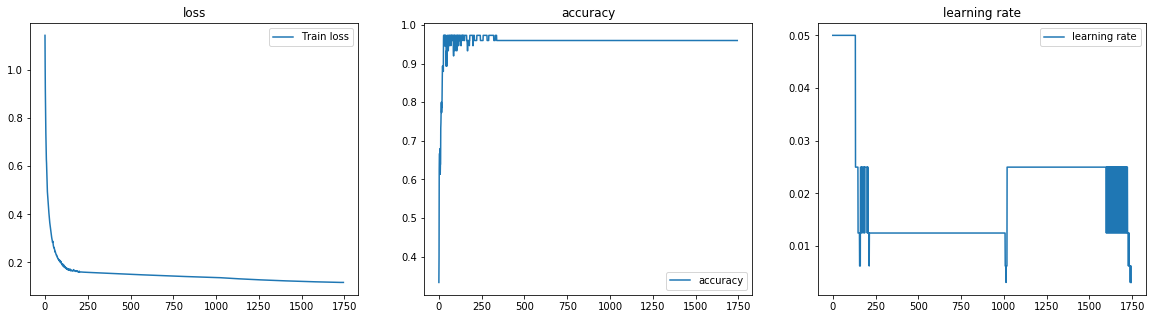

In [42]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [43]:
'''
trained gamma
'''
clf.current_gamma()

0.06441574

In [44]:
'''
fixed landmarks
'''
lm = clf.current_lm()
lm

array([[6. , 2.2, 5. , 1.5],
       [6.1, 2.9, 4.7, 1.4],
       [4.3, 3. , 1.1, 0.1]], dtype=float32)

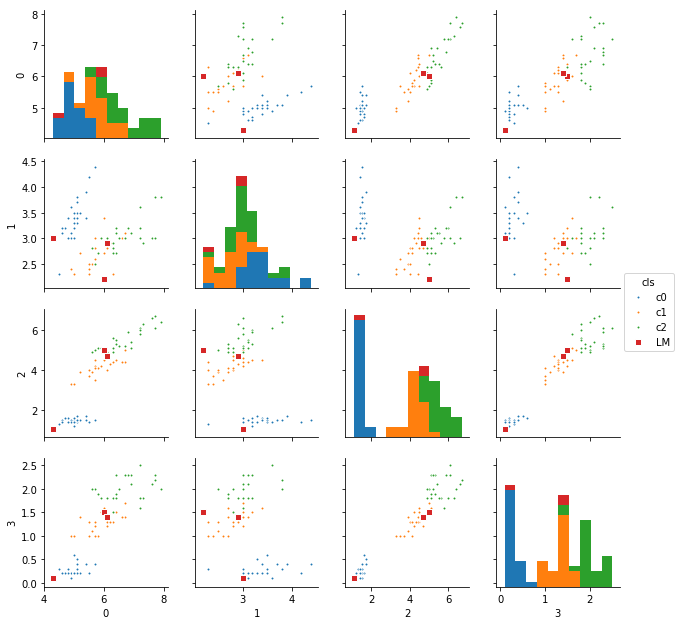

In [45]:
df = pd.DataFrame(np.r_[xtrain, lm])
df['cls'] = ['c'+str(ee) for ee in np.argmax(ytrain, axis=1)] + ['LM']*lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['.']*3+['s'], hue='cls', size=2.2, diag_kind='hist')

In [46]:
clf.predict_proba(xtest)[:5]

array([[9.9847811e-01, 1.5219267e-03, 4.5162192e-13],
       [9.9930036e-01, 6.9967151e-04, 4.9400930e-14],
       [9.9878997e-01, 1.2100523e-03, 3.2663133e-13],
       [9.9912673e-01, 8.7326986e-04, 7.9569340e-14],
       [9.9928755e-01, 7.1251532e-04, 4.0320344e-14]], dtype=float32)

In [47]:
pred = clf.predict(xtrain)
pred[:5]

array([0, 0, 0, 0, 0])

In [48]:
print('F1_SCORE :', f1_score(np.argmax(ytrain, axis=1), pred, average='macro'))
print(classification_report(np.argmax(ytrain, axis=1), pred))
print(confusion_matrix(np.argmax(ytrain, axis=1), pred))

F1_SCORE : 0.9599839935974389
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.96      0.92      0.94        25
           2       0.92      0.96      0.94        25

   micro avg       0.96      0.96      0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75

[[25  0  0]
 [ 0 23  2]
 [ 0  1 24]]


In [49]:
pred_test = clf.predict(xtest)

In [50]:
print('F1_SCORE :', f1_score(np.argmax(yans, axis=1), pred_test, average='macro'))
print(classification_report(np.argmax(yans, axis=1), pred_test))
print(confusion_matrix(np.argmax(yans, axis=1), pred_test))

F1_SCORE : 0.9063294526963737
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.91      0.80      0.85        25
           2       0.82      0.92      0.87        25

   micro avg       0.91      0.91      0.91        75
   macro avg       0.91      0.91      0.91        75
weighted avg       0.91      0.91      0.91        75

[[25  0  0]
 [ 0 20  5]
 [ 0  2 23]]


## set landmarks on input x randomly (num_lm = 25)

In [51]:
num_lm = 25
clf = RBFClassifier(
    num_lm=num_lm,
    lm=xtrain[np.random.choice(np.arange(xtrain.shape[0]), num_lm)]
)

In [52]:
%%time
#hst = clf.fit(xtrain, ytrain, epochs=500, batch_size=256, verbose=0)
hst = clf.fit(xtrain, ytrain, epochs=200, verbose=0)

CPU times: user 3.7 s, sys: 69.9 ms, total: 3.77 s
Wall time: 3.31 s


In [53]:
clf.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inp (InputLayer)             (None, 4)                 0         
_________________________________________________________________
model_gkernel (Model)        (None, 25)                1         
_________________________________________________________________
model_out (Model)            (None, 3)                 78        
Total params: 79
Trainable params: 79
Non-trainable params: 0
_________________________________________________________________


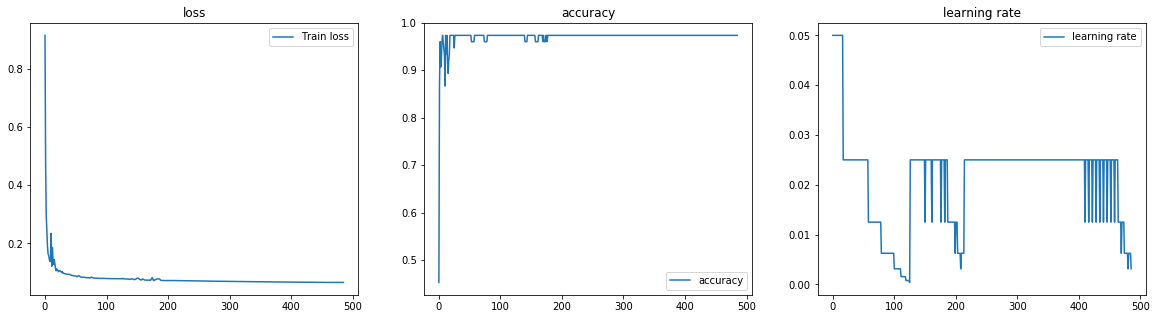

In [54]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [55]:
'''
trained gamma
'''
clf.current_gamma()

0.727591

In [56]:
'''
fixed landmarks
'''
lm = clf.current_lm()
lm

array([[6. , 2.2, 5. , 1.5],
       [4.7, 3.2, 1.6, 0.2],
       [5.8, 2.7, 4.1, 1. ],
       [6.1, 2.9, 4.7, 1.4],
       [5. , 3.4, 1.5, 0.2],
       [6.4, 3.2, 4.5, 1.5],
       [5.8, 2.7, 5.1, 1.9],
       [7.2, 3. , 5.8, 1.6],
       [6.5, 3. , 5.2, 2. ],
       [6.2, 2.9, 4.3, 1.3],
       [5.2, 2.7, 3.9, 1.4],
       [5.1, 3.7, 1.5, 0.4],
       [6.3, 2.8, 5.1, 1.5],
       [6. , 3.4, 4.5, 1.6],
       [5. , 3.4, 1.5, 0.2],
       [6.5, 3. , 5.2, 2. ],
       [4.9, 2.4, 3.3, 1. ],
       [6.4, 3.2, 4.5, 1.5],
       [6. , 2.7, 5.1, 1.6],
       [6.1, 2.8, 4. , 1.3],
       [7.6, 3. , 6.6, 2.1],
       [5.1, 3.3, 1.7, 0.5],
       [6. , 2.2, 5. , 1.5],
       [6.3, 2.3, 4.4, 1.3],
       [7.2, 3. , 5.8, 1.6]], dtype=float32)

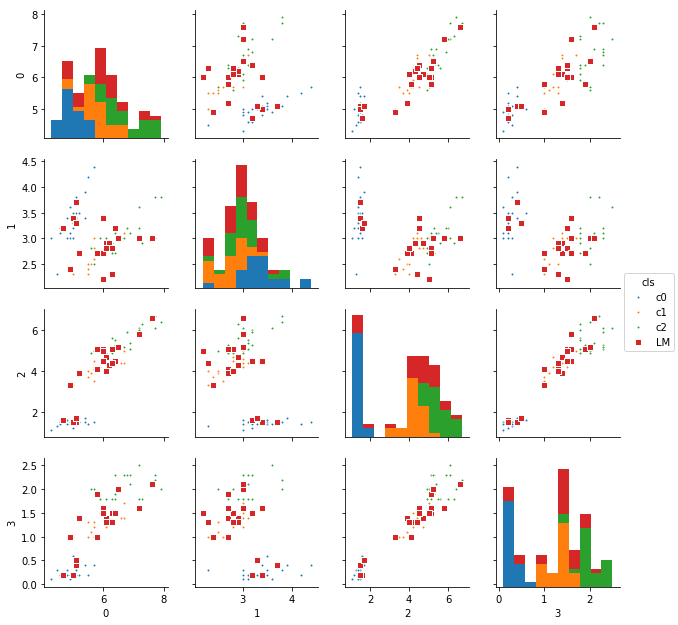

In [57]:
df = pd.DataFrame(np.r_[xtrain, lm])
df['cls'] = ['c'+str(ee) for ee in np.argmax(ytrain, axis=1)] + ['LM']*lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['.']*3+['s'], hue='cls', size=2.2, diag_kind='hist')

In [58]:
clf.predict_proba(xtest)[:5]

array([[1.0000000e+00, 1.4238570e-10, 6.3503375e-13],
       [1.0000000e+00, 1.4187829e-09, 9.1619134e-12],
       [1.0000000e+00, 1.7758929e-10, 9.1000829e-13],
       [1.0000000e+00, 1.0225524e-09, 6.1441234e-12],
       [9.9999964e-01, 3.3039029e-07, 7.9705318e-09]], dtype=float32)

In [59]:
pred = clf.predict(xtrain)
pred[:5]

array([0, 0, 0, 0, 0])

In [60]:
print('F1_SCORE :', f1_score(np.argmax(ytrain, axis=1), pred, average='macro'))
print(classification_report(np.argmax(ytrain, axis=1), pred))
print(confusion_matrix(np.argmax(ytrain, axis=1), pred))

F1_SCORE : 0.9732905982905983
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      0.92      0.96        25
           2       0.93      1.00      0.96        25

   micro avg       0.97      0.97      0.97        75
   macro avg       0.98      0.97      0.97        75
weighted avg       0.98      0.97      0.97        75

[[25  0  0]
 [ 0 23  2]
 [ 0  0 25]]


In [61]:
pred_test = clf.predict(xtest)

In [62]:
print('F1_SCORE :', f1_score(np.argmax(yans, axis=1), pred_test, average='macro'))
print(classification_report(np.argmax(yans, axis=1), pred_test))
print(confusion_matrix(np.argmax(yans, axis=1), pred_test))

F1_SCORE : 0.9598554797270173
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.89      1.00      0.94        25
           2       1.00      0.88      0.94        25

   micro avg       0.96      0.96      0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75

[[25  0  0]
 [ 0 25  0]
 [ 0  3 22]]


## set landmarks automatically on input x
* num_lm = 25

In [63]:
num_lm = 25
clf = RBFClassifier(
    num_lm=num_lm,
    lm_select_from_x=True,
    random_state=10001
)

In [64]:
%%time
#hst = clf.fit(xtrain, ytrain, epochs=500, batch_size=256, verbose=0)
hst = clf.fit(xtrain, ytrain, epochs=200, verbose=0)

CPU times: user 2.56 s, sys: 29.4 ms, total: 2.59 s
Wall time: 2.42 s


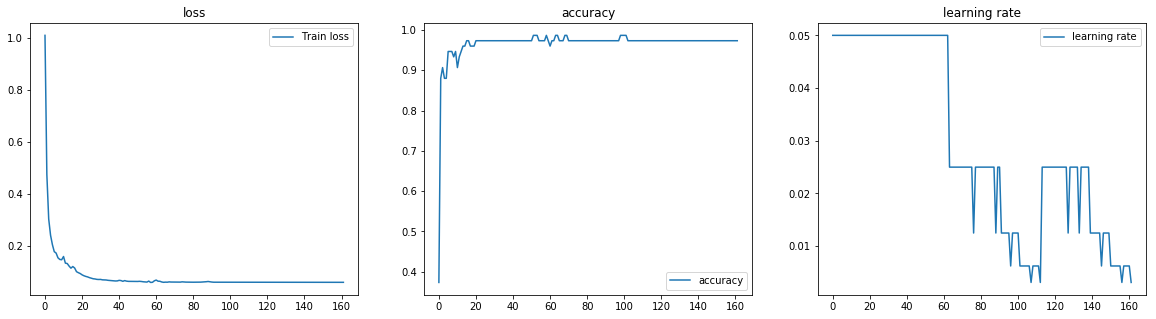

In [65]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [66]:
'''
trained gamma
'''
clf.current_gamma()

1.0817927

In [67]:
'''
fixed landmarks
'''
lm = clf.current_lm()
lm

array([[6. , 3.4, 4.5, 1.6],
       [6.1, 3. , 4.9, 1.8],
       [6.4, 3.2, 5.3, 2.3],
       [5.5, 4.2, 1.4, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6. , 2.2, 5. , 1.5],
       [4.6, 3.1, 1.5, 0.2],
       [5.5, 2.3, 4. , 1.3],
       [4.9, 3. , 1.4, 0.2],
       [6.3, 2.8, 5.1, 1.5],
       [5.6, 2.5, 3.9, 1.1],
       [5.7, 2.5, 5. , 2. ],
       [5. , 3.4, 1.5, 0.2],
       [5.7, 2.6, 3.5, 1. ],
       [6.8, 3.2, 5.9, 2.3],
       [4.8, 3.4, 1.6, 0.2],
       [5.5, 2.5, 4. , 1.3],
       [4.7, 3.2, 1.6, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [7.7, 3. , 6.1, 2.3],
       [6.7, 3.1, 4.4, 1.4],
       [6.1, 3. , 4.6, 1.4],
       [4.8, 3. , 1.4, 0.3],
       [7.7, 3.8, 6.7, 2.2],
       [6.4, 3.2, 4.5, 1.5]], dtype=float32)

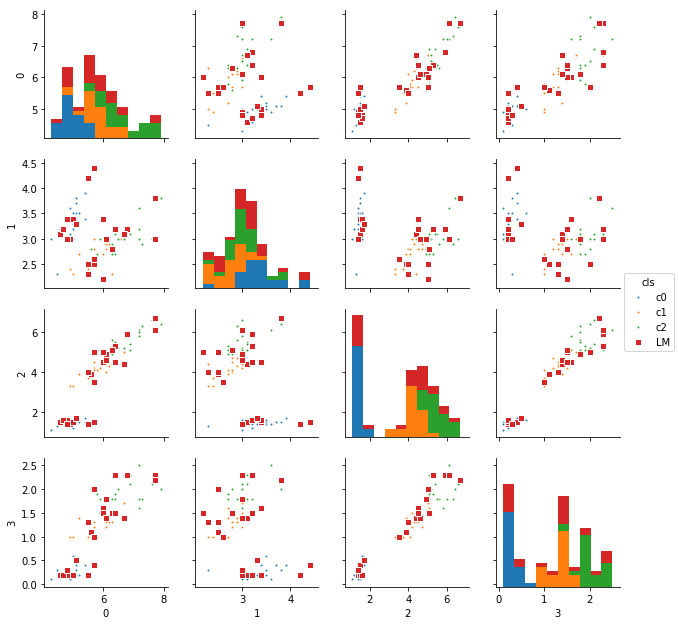

In [68]:
df = pd.DataFrame(np.r_[xtrain, lm])
df['cls'] = ['c'+str(ee) for ee in np.argmax(ytrain, axis=1)] + ['LM']*lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['.']*3+['s'], hue='cls', size=2.2, diag_kind='hist')

In [69]:
clf.predict_proba(xtest)[:5]

array([[1.0000000e+00, 4.8487330e-09, 1.0933103e-12],
       [1.0000000e+00, 4.6292001e-09, 5.1089889e-13],
       [1.0000000e+00, 6.7382220e-09, 1.8730085e-12],
       [1.0000000e+00, 8.8885175e-09, 1.4856277e-12],
       [9.9999964e-01, 3.9556949e-07, 2.7936520e-10]], dtype=float32)

In [70]:
pred = clf.predict(xtrain)
pred[:5]

array([0, 0, 0, 0, 0])

In [71]:
print('F1_SCORE :', f1_score(np.argmax(ytrain, axis=1), pred, average='macro'))
print(classification_report(np.argmax(ytrain, axis=1), pred))
print(confusion_matrix(np.argmax(ytrain, axis=1), pred))

F1_SCORE : 0.9732905982905983
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      0.92      0.96        25
           2       0.93      1.00      0.96        25

   micro avg       0.97      0.97      0.97        75
   macro avg       0.98      0.97      0.97        75
weighted avg       0.98      0.97      0.97        75

[[25  0  0]
 [ 0 23  2]
 [ 0  0 25]]


In [72]:
pred_test = clf.predict(xtest)

In [73]:
print('F1_SCORE :', f1_score(np.argmax(yans, axis=1), pred_test, average='macro'))
print(classification_report(np.argmax(yans, axis=1), pred_test))
print(confusion_matrix(np.argmax(yans, axis=1), pred_test))

F1_SCORE : 0.9866613311991465
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.96      1.00      0.98        25
           2       1.00      0.96      0.98        25

   micro avg       0.99      0.99      0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75

[[25  0  0]
 [ 0 25  0]
 [ 0  1 24]]


## set initial landmarks manually and train
* num_lm = 15
* train landmarks

In [74]:
num_lm = 15
init_lm = np.c_[
    np.random.random((num_lm,))*4+4,
    np.random.random((num_lm,))*2+2.5,
    np.random.random((num_lm,))*4+2,
    np.random.random((num_lm,))*2.5
]
# init_lm = np.c_[
#     np.random.random((num_lm,)),
#     np.random.random((num_lm,)),
#     np.random.random((num_lm,)),
#     np.random.random((num_lm,))
# ]

clf = RBFClassifier(
    num_lm=num_lm,
    lm=init_lm,
    make_model_gkernel=make_model_gkernel3
)

In [75]:
init_lm

array([[4.52839887, 3.9911084 , 4.64085477, 0.89992717],
       [7.26916005, 2.88373948, 3.25040955, 0.77946152],
       [6.43492879, 3.13434974, 5.78821527, 0.13398432],
       [4.11978874, 3.29909224, 4.35776886, 1.77522352],
       [7.05236216, 3.01480185, 4.69240824, 1.09887604],
       [6.18131702, 3.66976967, 3.37821466, 0.09988398],
       [7.47954621, 2.96500272, 5.26280968, 2.42011833],
       [7.74876003, 4.32211188, 5.41356289, 1.74450445],
       [6.14436686, 3.43064301, 4.08588766, 1.41586234],
       [5.70059157, 3.28840892, 3.16512299, 0.90319252],
       [4.45636297, 3.82836064, 2.90789305, 1.13539703],
       [5.63832893, 4.19665077, 2.04868768, 1.21636713],
       [6.15335333, 3.76254149, 4.61283786, 2.36013429],
       [7.24696563, 3.50836467, 5.17944421, 1.78377404],
       [7.23775976, 3.78331587, 4.99346696, 0.6160429 ]])

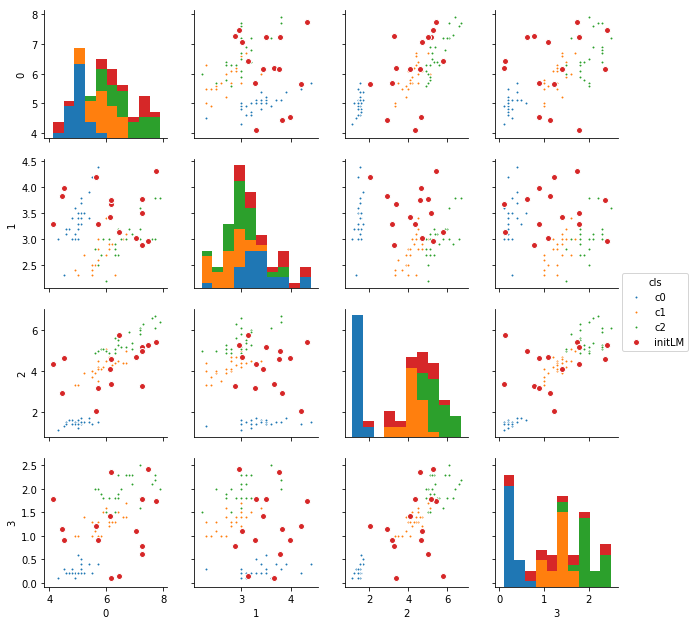

In [76]:
df = pd.DataFrame(np.r_[xtrain, init_lm])
df['cls'] = ['c'+str(ee) for ee in np.argmax(ytrain, axis=1)] + ['initLM']*init_lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['.']*3+['o'], hue='cls', size=2.2, diag_kind='hist')

In [77]:
%%time
#hst = clf.fit(xtrain, ytrain, epochs=500, batch_size=256, verbose=0)
hst = clf.fit(xtrain, ytrain, epochs=200, verbose=0)

CPU times: user 3.34 s, sys: 45.4 ms, total: 3.38 s
Wall time: 3.08 s


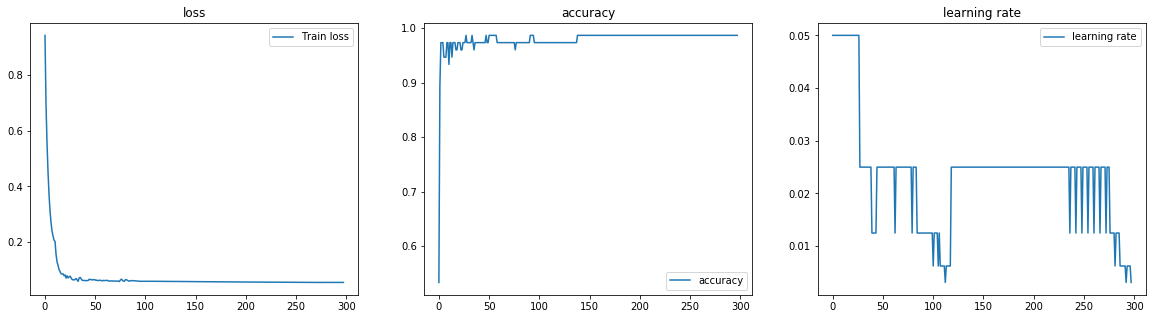

In [78]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [79]:
'''
trained gamma
'''
clf.current_gamma()

0.27958268

In [80]:
'''
trained landmarks
'''
lm = clf.current_lm()
lm

array([[4.9697146 , 3.052197  , 4.0199423 , 0.45404676],
       [6.9710555 , 3.3184586 , 3.7923083 , 0.74948114],
       [5.701463  , 2.0227017 , 5.497883  , 1.9044417 ],
       [4.7558355 , 2.2578006 , 3.7993221 , 1.0518183 ],
       [6.956368  , 3.3192158 , 4.101128  , 0.70924306],
       [6.6767287 , 3.3342657 , 3.745664  , 0.4636172 ],
       [6.352894  , 2.458132  , 5.630112  , 2.712652  ],
       [7.11672   , 3.7332554 , 6.3491626 , 2.7429013 ],
       [6.587649  , 3.2351496 , 3.876782  , 0.623464  ],
       [6.5569124 , 3.2564902 , 3.4561226 , 0.59118766],
       [5.3120265 , 3.228779  , 2.3439736 , 0.3565959 ],
       [5.0606604 , 3.5474362 , 1.222973  , 0.21683523],
       [5.7204084 , 2.6315813 , 5.0963144 , 2.6818202 ],
       [6.217916  , 2.6822681 , 5.6546354 , 2.7359674 ],
       [6.9838696 , 3.378479  , 4.2589607 , 0.6879753 ]], dtype=float32)

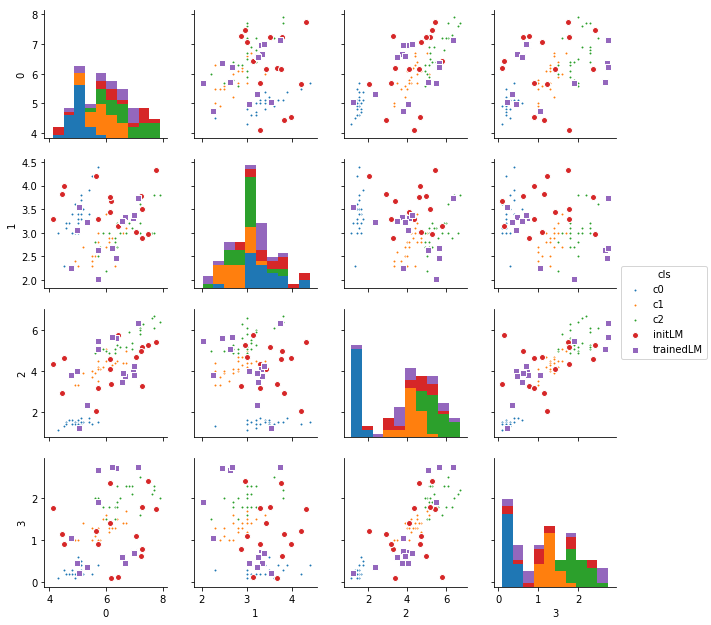

In [81]:
df = pd.DataFrame(np.r_[xtrain, init_lm, lm])
df['cls'] = ['c'+str(ee) for ee in np.argmax(ytrain, axis=1)] + ['initLM']*init_lm.shape[0] + ['trainedLM']*lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['.']*3+['o','s'], hue='cls', size=2.2, diag_kind='hist')

In [82]:
clf.predict_proba(xtest)[:5]

array([[9.9984848e-01, 1.4532234e-04, 6.2443278e-06],
       [9.9983108e-01, 1.4998252e-04, 1.9003872e-05],
       [9.9986136e-01, 1.3124227e-04, 7.4091627e-06],
       [9.9981493e-01, 1.6610975e-04, 1.8985305e-05],
       [9.9945766e-01, 4.4836171e-04, 9.3959141e-05]], dtype=float32)

In [83]:
pred = clf.predict(xtrain)
pred[:5]

array([0, 0, 0, 0, 0])

In [84]:
print('F1_SCORE :', f1_score(np.argmax(ytrain, axis=1), pred, average='macro'))
print(classification_report(np.argmax(ytrain, axis=1), pred))
print(confusion_matrix(np.argmax(ytrain, axis=1), pred))

F1_SCORE : 0.9866613311991462
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      0.96      0.98        25
           2       0.96      1.00      0.98        25

   micro avg       0.99      0.99      0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75

[[25  0  0]
 [ 0 24  1]
 [ 0  0 25]]


In [85]:
pred_test = clf.predict(xtest)

In [86]:
print('F1_SCORE :', f1_score(np.argmax(yans, axis=1), pred_test, average='macro'))
print(classification_report(np.argmax(yans, axis=1), pred_test))
print(confusion_matrix(np.argmax(yans, axis=1), pred_test))

F1_SCORE : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        25

   micro avg       1.00      1.00      1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75

[[25  0  0]
 [ 0 25  0]
 [ 0  0 25]]


## set initial landmarks manually and no train
* num_lm = 15
* train nothing, just activation

In [87]:
num_lm = 15
init_lm = np.c_[
    np.random.random((num_lm,))*4+4,
    np.random.random((num_lm,))*2+2.5,
    np.random.random((num_lm,))*4+2,
    np.random.random((num_lm,))*2.5
]

clf = RBFClassifier(
    num_lm=num_lm,
    lm=init_lm,
    gamma='scale',
    make_model_gkernel=make_model_gkernel1
)

In [88]:
init_lm

array([[6.70679104, 2.74538228, 5.38773276, 2.17280851],
       [4.93524883, 3.51473318, 4.38670968, 1.82893547],
       [4.31767582, 3.27274291, 2.99187693, 2.46856383],
       [6.98019217, 3.44911835, 2.94498006, 0.78624584],
       [6.00484219, 2.85562126, 2.56234347, 0.42130191],
       [4.70641305, 4.03765889, 2.09545303, 2.23663124],
       [7.10024427, 4.28389601, 5.40652854, 0.25719187],
       [6.09459724, 2.95953379, 4.65823259, 0.63012346],
       [7.94321028, 2.87132481, 2.48252523, 0.21871562],
       [5.88491763, 3.99385146, 5.12432411, 2.46944072],
       [4.75306779, 3.19425107, 3.0478387 , 1.68038315],
       [6.9821836 , 3.36055874, 5.80875044, 0.71652536],
       [6.32906946, 3.74926013, 4.00044588, 1.66876548],
       [6.29681722, 4.38462525, 3.91065436, 0.73726567],
       [5.72743649, 2.77738597, 4.41829189, 1.70074968]])

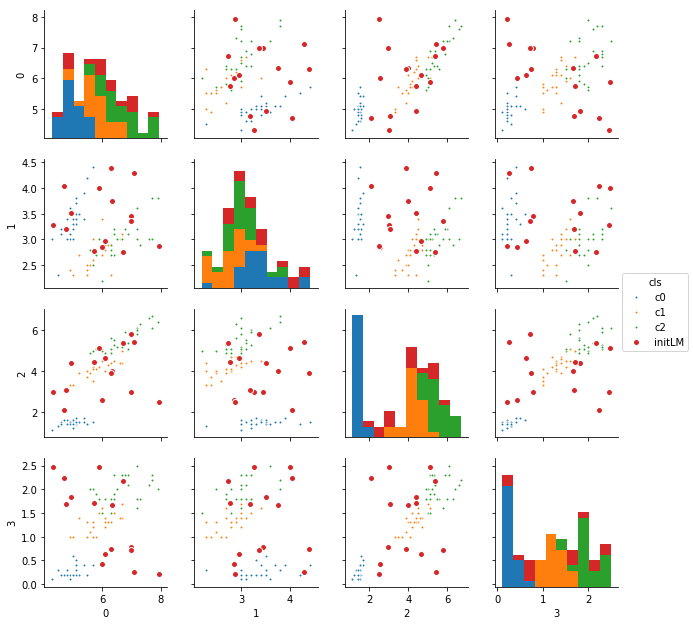

In [89]:
df = pd.DataFrame(np.r_[xtrain, init_lm])
df['cls'] = ['c'+str(ee) for ee in np.argmax(ytrain, axis=1)] + ['initLM']*init_lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['.']*3+['o'], hue='cls', size=2.2, diag_kind='hist')

In [90]:
%%time
#hst = clf.fit(xtrain, ytrain, epochs=500, batch_size=256, verbose=0)
hst = clf.fit(xtrain, ytrain, epochs=200, verbose=0)

CPU times: user 5.14 s, sys: 129 ms, total: 5.26 s
Wall time: 4.37 s


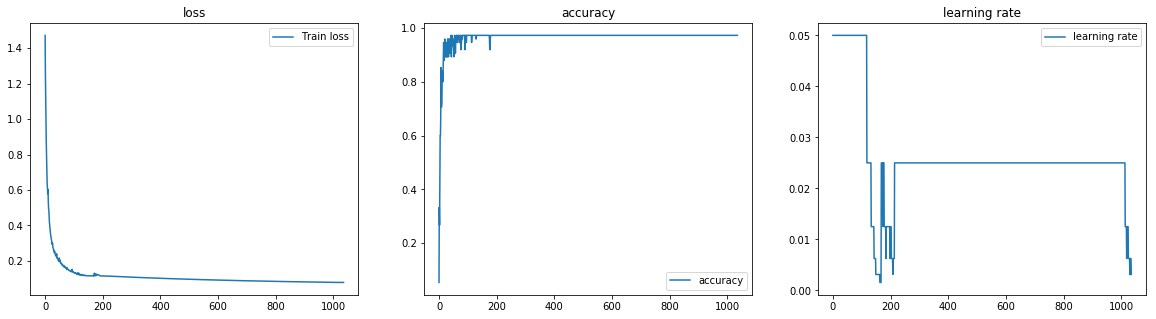

In [91]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [92]:
1 / (4*xtrain.var()), 1/(2*np.sqrt(4/6)*2)

(0.06392857199469391, 0.30618621784789724)

In [93]:
'''
gamma
'''
clf.current_gamma()

0.063928574

In [94]:
'''
trained nothing
'''
lm = clf.current_lm()
lm

array([[6.706791  , 2.7453823 , 5.387733  , 2.1728084 ],
       [4.935249  , 3.514733  , 4.3867097 , 1.8289355 ],
       [4.3176756 , 3.272743  , 2.9918768 , 2.4685638 ],
       [6.980192  , 3.4491184 , 2.9449801 , 0.7862458 ],
       [6.0048423 , 2.8556213 , 2.5623434 , 0.4213019 ],
       [4.7064133 , 4.0376587 , 2.095453  , 2.2366312 ],
       [7.100244  , 4.283896  , 5.4065285 , 0.25719187],
       [6.0945973 , 2.9595337 , 4.6582327 , 0.63012344],
       [7.94321   , 2.8713248 , 2.482525  , 0.21871562],
       [5.8849177 , 3.9938514 , 5.1243243 , 2.4694407 ],
       [4.753068  , 3.194251  , 3.0478387 , 1.6803831 ],
       [6.9821835 , 3.3605587 , 5.8087506 , 0.7165254 ],
       [6.3290696 , 3.7492602 , 4.000446  , 1.6687654 ],
       [6.2968173 , 4.3846254 , 3.9106543 , 0.73726565],
       [5.7274365 , 2.777386  , 4.418292  , 1.7007496 ]], dtype=float32)

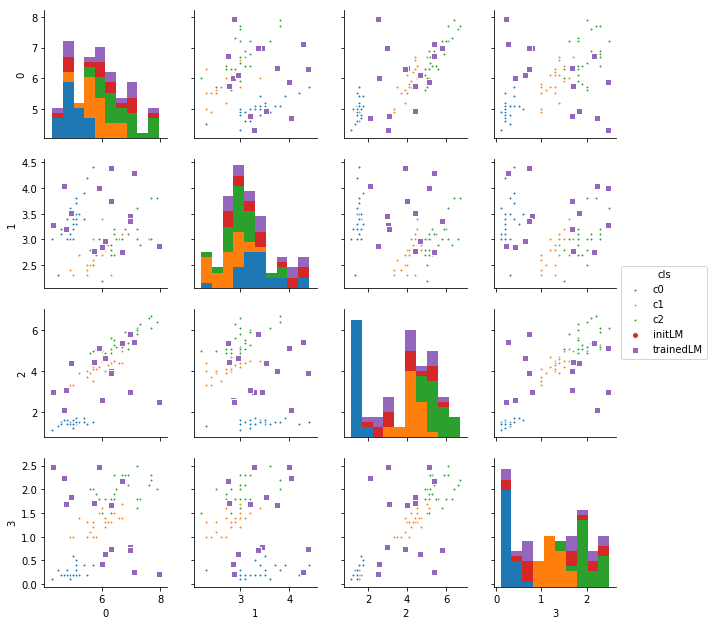

In [95]:
df = pd.DataFrame(np.r_[xtrain, init_lm, lm])
df['cls'] = ['c'+str(ee) for ee in np.argmax(ytrain, axis=1)] + ['initLM']*init_lm.shape[0] + ['trainedLM']*lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['.']*3+['o','s'], hue='cls', size=2.2, diag_kind='hist')

In [96]:
clf.predict_proba(xtest)[:5]

array([[9.9695766e-01, 3.0424111e-03, 2.8456197e-08],
       [9.9867237e-01, 1.3276094e-03, 5.2738290e-08],
       [9.9741578e-01, 2.5841466e-03, 3.5133411e-08],
       [9.9849033e-01, 1.5095406e-03, 7.0941873e-08],
       [9.9870086e-01, 1.2990350e-03, 1.5000016e-07]], dtype=float32)

In [97]:
clf.predict_proba(xtest).sum(axis=1)

array([1.0000001 , 1.        , 1.        , 0.99999994, 1.        ,
       1.        , 0.99999994, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.99999994, 1.        , 1.        , 0.99999994, 1.        ,
       0.99999994, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.0000001 , 1.        , 1.        , 1.        ,
       1.        , 0.99999994, 1.0000001 , 0.99999994, 1.0000001 ,
       1.        , 0.99999994, 1.        , 1.        , 1.0000001 ,
       1.0000001 , 0.99999994, 1.0000001 , 1.        , 0.99999994,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.0000001 , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [98]:
pred = clf.predict(xtrain)
pred[:5]

array([0, 0, 0, 0, 0])

In [99]:
print('F1_SCORE :', f1_score(np.argmax(ytrain, axis=1), pred, average='macro'))
print(classification_report(np.argmax(ytrain, axis=1), pred))
print(confusion_matrix(np.argmax(ytrain, axis=1), pred))

F1_SCORE : 0.9732905982905983
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      0.92      0.96        25
           2       0.93      1.00      0.96        25

   micro avg       0.97      0.97      0.97        75
   macro avg       0.98      0.97      0.97        75
weighted avg       0.98      0.97      0.97        75

[[25  0  0]
 [ 0 23  2]
 [ 0  0 25]]


In [100]:
pred_test = clf.predict(xtest)

In [101]:
print('F1_SCORE :', f1_score(np.argmax(yans, axis=1), pred_test, average='macro'))
print(classification_report(np.argmax(yans, axis=1), pred_test))
print(confusion_matrix(np.argmax(yans, axis=1), pred_test))

F1_SCORE : 0.9733333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.96      0.96      0.96        25
           2       0.96      0.96      0.96        25

   micro avg       0.97      0.97      0.97        75
   macro avg       0.97      0.97      0.97        75
weighted avg       0.97      0.97      0.97        75

[[25  0  0]
 [ 0 24  1]
 [ 0  1 24]]


## vector input

In [102]:
num_lm = 15
init_lm = np.c_[
    np.random.random((num_lm,))*4+4,
    np.random.random((num_lm,))*2+2.5,
    np.random.random((num_lm,))*4+2,
    np.random.random((num_lm,))*2.5
]

clf = RBFClassifier(
    num_lm=num_lm,
    lm=init_lm,
    gamma='scale',
    make_model_gkernel=make_model_gkernel1
)

In [103]:
init_lm

array([[6.36334044, 4.45012159, 5.13173299, 2.4821159 ],
       [7.6880823 , 3.68608862, 4.6289611 , 2.46663108],
       [6.69096613, 3.8693022 , 2.48252138, 1.23262254],
       [6.28490134, 3.79499375, 2.33737364, 0.14361999],
       [4.11350267, 3.82462671, 3.26391239, 2.11180289],
       [4.01483745, 3.53053749, 5.60846518, 0.95186145],
       [6.89753649, 4.11066917, 4.78980488, 2.06192506],
       [6.46757423, 4.331531  , 2.01692601, 2.49680952],
       [6.16918937, 2.90305313, 3.73172046, 2.06376784],
       [4.12791583, 3.24313609, 3.53350304, 1.10674507],
       [7.86352192, 3.8360491 , 3.9929001 , 1.86856848],
       [7.33930164, 3.13278947, 4.36088662, 0.31317266],
       [5.82916861, 3.04115314, 3.25759311, 1.05000172],
       [7.29026383, 4.02481191, 3.61013969, 0.27148817],
       [6.52481027, 4.36790474, 2.12844472, 0.9544247 ]])

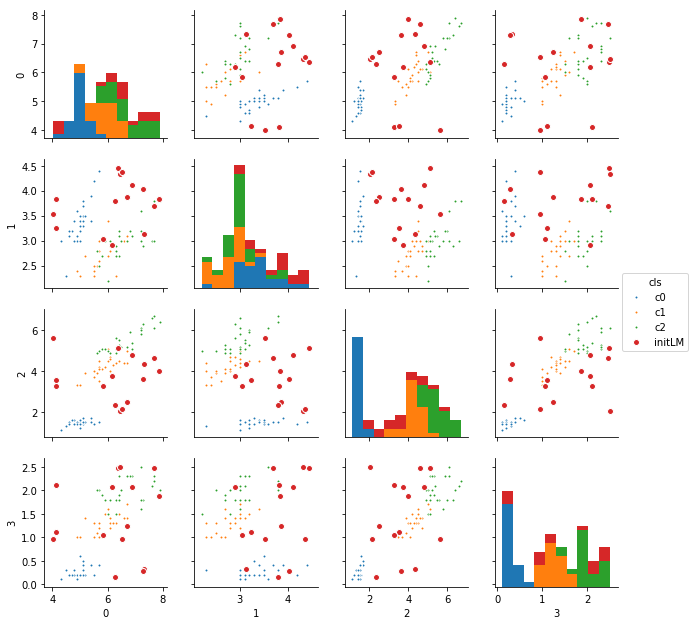

In [104]:
df = pd.DataFrame(np.r_[xtrain, init_lm])
df['cls'] = ['c'+str(ee) for ee in np.argmax(ytrain, axis=1)] + ['initLM']*init_lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['.']*3+['o'], hue='cls', size=2.2, diag_kind='hist')

In [105]:
ytrain[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [106]:
np.argmax(ytrain, axis=1)[:5]

array([0, 0, 0, 0, 0])

In [107]:
%%time
#hst = clf.fit(xtrain, np.argmax(ytrain, axis=1), epochs=500, batch_size=256, verbose=0)
hst = clf.fit(xtrain, np.argmax(ytrain, axis=1), epochs=200, verbose=0)

CPU times: user 5.58 s, sys: 140 ms, total: 5.72 s
Wall time: 4.73 s


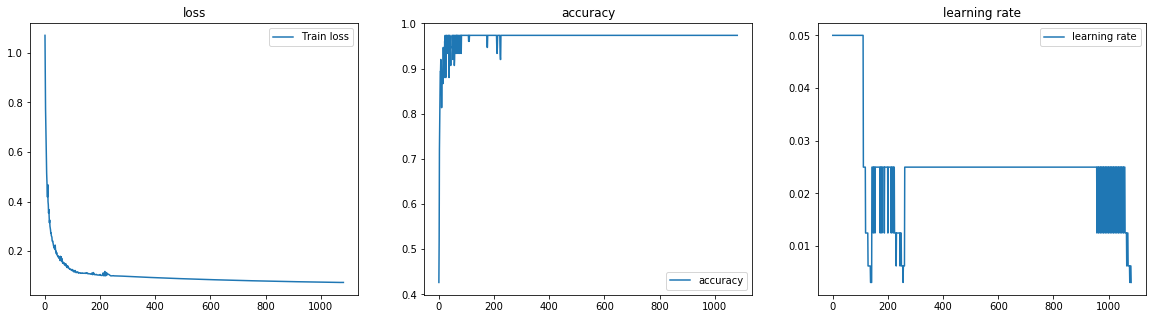

In [108]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [109]:
1 / (4*xtrain.var()), 1/(2*np.sqrt(4/6)*2)

(0.06392857199469391, 0.30618621784789724)

In [110]:
'''
gamma
'''
clf.current_gamma()

0.063928574

In [111]:
'''
trained nothing
'''
lm = clf.current_lm()
lm

array([[6.3633404 , 4.4501214 , 5.131733  , 2.482116  ],
       [7.688082  , 3.6860886 , 4.628961  , 2.4666312 ],
       [6.690966  , 3.8693023 , 2.4825213 , 1.2326225 ],
       [6.284901  , 3.7949936 , 2.3373737 , 0.14361998],
       [4.1135025 , 3.8246267 , 3.2639124 , 2.1118028 ],
       [4.0148373 , 3.5305376 , 5.608465  , 0.95186144],
       [6.8975363 , 4.110669  , 4.789805  , 2.0619252 ],
       [6.467574  , 4.331531  , 2.016926  , 2.4968095 ],
       [6.1691895 , 2.903053  , 3.7317204 , 2.063768  ],
       [4.127916  , 3.2431362 , 3.533503  , 1.1067451 ],
       [7.863522  , 3.836049  , 3.9929001 , 1.8685684 ],
       [7.3393016 , 3.1327894 , 4.3608866 , 0.31317267],
       [5.829169  , 3.0411532 , 3.2575932 , 1.0500017 ],
       [7.2902637 , 4.0248117 , 3.6101396 , 0.27148816],
       [6.5248103 , 4.3679047 , 2.1284447 , 0.9544247 ]], dtype=float32)

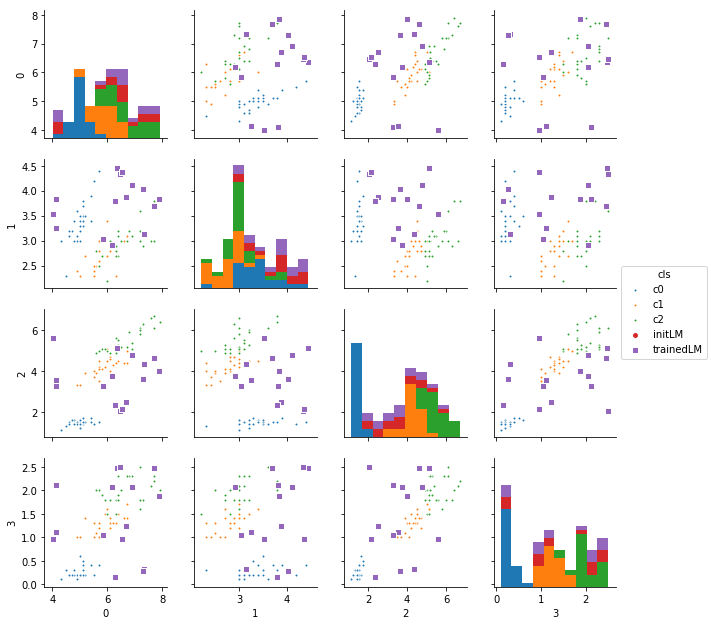

In [112]:
df = pd.DataFrame(np.r_[xtrain, init_lm, lm])
df['cls'] = ['c'+str(ee) for ee in np.argmax(ytrain, axis=1)] + ['initLM']*init_lm.shape[0] + ['trainedLM']*lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['.']*3+['o','s'], hue='cls', size=2.2, diag_kind='hist')

In [113]:
clf.predict_proba(xtest)[:5]

array([[9.9840647e-01, 1.5935792e-03, 1.5317890e-09],
       [9.9884641e-01, 1.1535562e-03, 1.0025452e-08],
       [9.9864501e-01, 1.3550416e-03, 1.7699392e-09],
       [9.9866891e-01, 1.3310517e-03, 1.1512993e-08],
       [9.9826616e-01, 1.7337613e-03, 8.7652040e-08]], dtype=float32)

In [114]:
pred = clf.predict(xtrain)
pred[:5]

array([0, 0, 0, 0, 0])

In [115]:
print('F1_SCORE :', f1_score(np.argmax(ytrain, axis=1), pred, average='macro'))
print(classification_report(np.argmax(ytrain, axis=1), pred))
print(confusion_matrix(np.argmax(ytrain, axis=1), pred))

F1_SCORE : 0.9732905982905983
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      0.92      0.96        25
           2       0.93      1.00      0.96        25

   micro avg       0.97      0.97      0.97        75
   macro avg       0.98      0.97      0.97        75
weighted avg       0.98      0.97      0.97        75

[[25  0  0]
 [ 0 23  2]
 [ 0  0 25]]


In [116]:
pred_test = clf.predict(xtest)

In [117]:
print('F1_SCORE :', f1_score(np.argmax(yans, axis=1), pred_test, average='macro'))
print(classification_report(np.argmax(yans, axis=1), pred_test))
print(confusion_matrix(np.argmax(yans, axis=1), pred_test))

F1_SCORE : 0.9866613311991462
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      0.96      0.98        25
           2       0.96      1.00      0.98        25

   micro avg       0.99      0.99      0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75

[[25  0  0]
 [ 0 24  1]
 [ 0  0 25]]


## sigmoid + binary_crossentropy

In [118]:
num_lm = 15
init_lm = np.c_[
    np.random.random((num_lm,))*4+4,
    np.random.random((num_lm,))*2+2.5,
    np.random.random((num_lm,))*4+2,
    np.random.random((num_lm,))*2.5
]

clf = RBFClassifier(
    num_lm=num_lm,
    lm=init_lm,
    gamma='scale',
    activation='sigmoid', loss='binary_crossentropy',
    make_model_gkernel=make_model_gkernel3
)

In [119]:
init_lm

array([[6.6739118 , 3.59280177, 5.51867073, 2.43312914],
       [5.03694507, 3.06401478, 3.42676977, 0.5431442 ],
       [5.74245944, 4.21153539, 3.65007909, 1.19818062],
       [6.03774582, 3.3437383 , 2.56153732, 2.30564301],
       [4.73337068, 4.06597721, 5.72507952, 1.77343217],
       [7.29669104, 2.89401255, 4.84975035, 2.03996208],
       [5.9568239 , 2.78561661, 5.28460339, 0.18188844],
       [6.51233774, 4.39121535, 4.61662077, 1.52469414],
       [7.74907497, 3.2544164 , 4.75245227, 0.04676704],
       [5.93718949, 2.80182548, 4.08880473, 1.7963977 ],
       [7.76394629, 3.0972802 , 2.53141716, 1.2909511 ],
       [4.63605191, 3.92818313, 5.32161384, 2.3647036 ],
       [7.25484663, 3.41822025, 4.55139176, 2.25369376],
       [7.50953878, 4.4418308 , 5.19826224, 1.41747411],
       [4.0495573 , 4.25810124, 5.32189007, 2.23871426]])

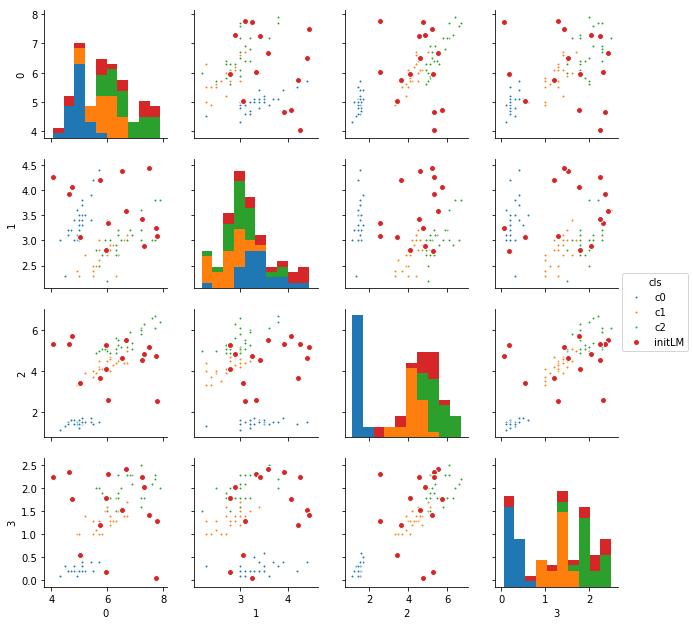

In [120]:
df = pd.DataFrame(np.r_[xtrain, init_lm])
df['cls'] = ['c'+str(ee) for ee in np.argmax(ytrain, axis=1)] + ['initLM']*init_lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['.']*3+['o'], hue='cls', size=2.2, diag_kind='hist')

In [121]:
%%time
#hst = clf.fit(xtrain, ytrain, epochs=500, batch_size=256, verbose=0)
hst = clf.fit(xtrain, ytrain, epochs=200, verbose=0)

CPU times: user 4.04 s, sys: 61.2 ms, total: 4.1 s
Wall time: 3.71 s


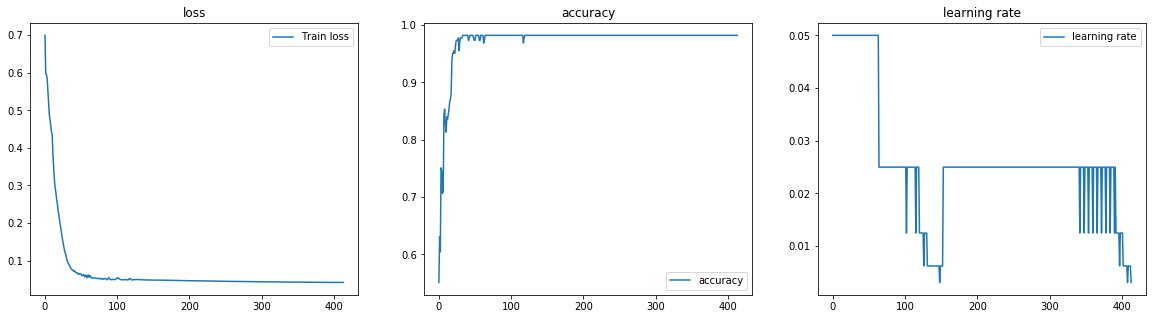

In [122]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [123]:
'''
gamma
'''
clf.current_gamma()

0.33413586

In [124]:
lm = clf.current_lm()
lm

array([[5.9026065 , 2.4305394 , 5.5116496 , 2.5916672 ],
       [6.5803924 , 3.261522  , 4.0125456 , 0.82464737],
       [5.0020638 , 3.394003  , 1.3468287 , 0.24783564],
       [5.0252094 , 3.4963884 , 1.2376547 , 0.20641103],
       [5.9791    , 2.4886165 , 5.543971  , 2.6002212 ],
       [7.1684084 , 3.361964  , 6.452208  , 2.4684947 ],
       [5.9365354 , 2.466783  , 5.4503026 , 2.5996804 ],
       [6.4886713 , 3.2092688 , 3.9995904 , 0.81881183],
       [5.8009057 , 2.8835702 , 3.7731302 , 0.7574876 ],
       [6.5712576 , 3.2505295 , 4.0301127 , 0.8265518 ],
       [5.0194097 , 3.4777591 , 1.25679   , 0.21557018],
       [5.293044  , 2.5634336 , 3.59555   , 0.82689923],
       [6.4828305 , 2.8721316 , 6.0559573 , 2.5830402 ],
       [5.923667  , 2.4572518 , 5.5978384 , 2.5891974 ],
       [6.3769264 , 3.1620317 , 3.970433  , 0.80464613]], dtype=float32)

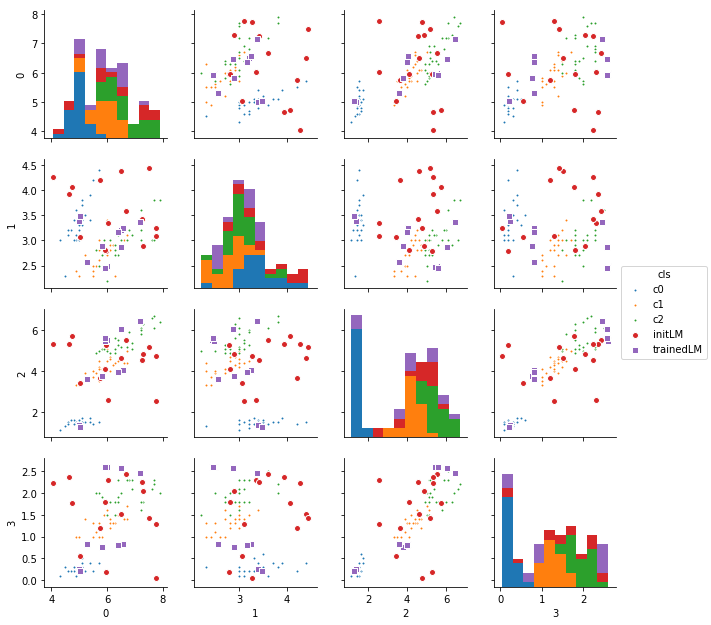

In [125]:
df = pd.DataFrame(np.r_[xtrain, init_lm, lm])
df['cls'] = ['c'+str(ee) for ee in np.argmax(ytrain, axis=1)] + ['initLM']*init_lm.shape[0] + ['trainedLM']*lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['.']*3+['o','s'], hue='cls', size=2.2, diag_kind='hist')

In [126]:
clf.predict_proba(xtrain)[:5]

array([[9.9927664e-01, 1.8372834e-03, 6.1854720e-04],
       [9.9907738e-01, 2.0869970e-03, 8.4704161e-04],
       [9.9787259e-01, 5.6028366e-03, 6.7135692e-04],
       [9.9951756e-01, 1.5015602e-03, 3.5330653e-04],
       [9.9927437e-01, 1.9145906e-03, 5.3697824e-04]], dtype=float32)

In [127]:
clf.predict_proba(xtrain).sum(axis=1)

array([1.0017325 , 1.0020115 , 1.0041468 , 1.0013725 , 1.0017259 ,
       1.0016367 , 1.0036182 , 1.0078664 , 1.0012422 , 1.0016216 ,
       1.0016156 , 1.003216  , 1.0024604 , 1.0015424 , 1.0019388 ,
       1.0023571 , 1.0037286 , 1.0011774 , 1.0011842 , 1.0014508 ,
       1.0096455 , 1.0022514 , 1.0018204 , 1.0016446 , 1.0012451 ,
       0.99454   , 1.0028365 , 1.0015775 , 0.97194827, 0.9997319 ,
       0.99901474, 0.99454474, 0.99716157, 1.0000151 , 1.0001988 ,
       0.9997886 , 0.9971465 , 0.9973901 , 0.9214542 , 0.9998802 ,
       0.99991   , 1.0255078 , 0.9891086 , 0.99521244, 1.0013424 ,
       0.99633694, 0.9783925 , 0.99984545, 0.9994229 , 1.000025  ,
       1.008381  , 1.0023496 , 1.0024579 , 1.0013103 , 1.0015697 ,
       1.0039823 , 1.0055726 , 1.0015255 , 1.0063237 , 1.0039424 ,
       1.011733  , 1.0138705 , 1.0017599 , 1.0137455 , 0.9958513 ,
       1.0025036 , 0.9826662 , 1.0016571 , 1.0042907 , 1.0024703 ,
       1.0003238 , 1.0006422 , 1.0018196 , 1.0054274 , 1.01590

In [128]:
pred = clf.predict(xtrain)
pred[:5]

array([0, 0, 0, 0, 0])

In [129]:
print('F1_SCORE :', f1_score(np.argmax(ytrain, axis=1), pred, average='macro'))
print(classification_report(np.argmax(ytrain, axis=1), pred))
print(confusion_matrix(np.argmax(ytrain, axis=1), pred))

F1_SCORE : 0.9732905982905983
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      0.92      0.96        25
           2       0.93      1.00      0.96        25

   micro avg       0.97      0.97      0.97        75
   macro avg       0.98      0.97      0.97        75
weighted avg       0.98      0.97      0.97        75

[[25  0  0]
 [ 0 23  2]
 [ 0  0 25]]


In [130]:
pred_test = clf.predict(xtest)

In [131]:
print('F1_SCORE :', f1_score(np.argmax(yans, axis=1), pred_test, average='macro'))
print(classification_report(np.argmax(yans, axis=1), pred_test))
print(confusion_matrix(np.argmax(yans, axis=1), pred_test))

F1_SCORE : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        25

   micro avg       1.00      1.00      1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75

[[25  0  0]
 [ 0 25  0]
 [ 0  0 25]]


## Regressor

In [132]:
est = RBFRegressor(
    num_lm=30,
    lm=xtrain[np.random.choice(np.arange(xtrain.shape[0]), 30)],
    make_model_gkernel=make_model_gkernel3
)
# est = RBFRegressor(
#     num_lm=10,
#     lm=xtrain[:10],
#     make_model_gkernel=make_model_gkernel3,
#     loss='mae'
# )

In [133]:
%%time
#hst = est.fit(xtrain, np.argmax(ytrain, axis=1), epochs=500, batch_size=256, verbose=0)
hst = est.fit(xtrain, np.argmax(ytrain, axis=1), epochs=200, verbose=0)

CPU times: user 2.28 s, sys: 29.8 ms, total: 2.31 s
Wall time: 2.15 s


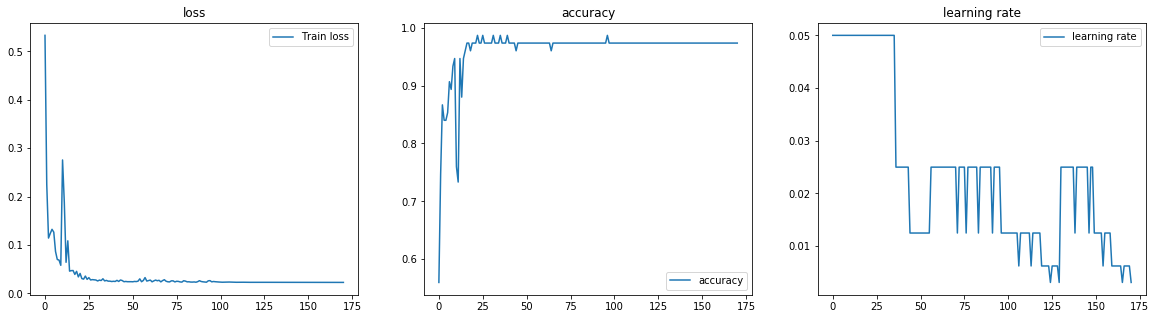

In [134]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [135]:
est.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inp (InputLayer)             (None, 4)                 0         
_________________________________________________________________
model_gkernel (Model)        (None, 30)                121       
_________________________________________________________________
model_out (Model)            (None, 1)                 31        
Total params: 152
Trainable params: 152
Non-trainable params: 0
_________________________________________________________________


In [136]:
est.predict(xtrain)

array([-4.0580630e-03,  1.1208713e-02,  2.3687422e-02,  7.5846910e-04,
        2.3109198e-02,  2.8101206e-02, -2.2353411e-02,  1.5007377e-02,
       -3.0663669e-02, -1.5103817e-02, -2.0627916e-02,  7.1064353e-02,
        6.4031452e-02,  3.0210614e-03,  3.5237730e-02,  1.9765556e-02,
       -1.0459423e-03, -4.6432734e-02, -7.9388022e-03,  4.3509007e-03,
        2.3994386e-02,  1.8343031e-02, -1.4303684e-02, -1.3150990e-02,
       -1.7679453e-02,  1.0012249e+00,  1.1679835e+00,  1.1220498e+00,
        8.8614309e-01,  1.0626888e+00,  1.0851612e+00,  1.2161119e+00,
        8.3388609e-01,  8.6010164e-01,  1.0078124e+00,  9.4440830e-01,
        1.0482531e+00,  9.0435708e-01,  1.5458171e+00,  9.2697018e-01,
        9.8836970e-01,  1.7221563e+00,  1.0432811e+00,  1.1592488e+00,
        1.1259794e+00,  1.1188785e+00,  9.2084026e-01,  8.8776559e-01,
        9.3818372e-01,  1.0324230e+00,  1.9838002e+00,  2.0256019e+00,
        1.9838376e+00,  2.0231948e+00,  1.9459839e+00,  2.0793011e+00,
      

In [137]:
est.__dict__

{'build_fn': <function keras_ex.gkernel.sklearn.make_model>,
 'model': <keras.engine.training.Model at 0x7f1aa018a0f0>,
 'sk_params': {'activation': 'linear',
  'callbacks': None,
  'epochs_warmup': 10,
  'lm': array([[6.3, 2.8, 5.1, 1.5],
         [5.2, 2.7, 3.9, 1.4],
         [6.9, 3.1, 5.4, 2.1],
         [6. , 2.7, 5.1, 1.6],
         [7.7, 3. , 6.1, 2.3],
         [6.2, 2.9, 4.3, 1.3],
         [4.6, 3.1, 1.5, 0.2],
         [5.7, 2.6, 3.5, 1. ],
         [4.9, 3. , 1.4, 0.2],
         [6.7, 3. , 5.2, 2.3],
         [6.3, 2.3, 4.4, 1.3],
         [6.7, 3. , 5. , 1.7],
         [6.3, 2.9, 5.6, 1.8],
         [6.7, 3.1, 4.4, 1.4],
         [6.1, 2.9, 4.7, 1.4],
         [6.3, 2.3, 4.4, 1.3],
         [5.7, 3. , 4.2, 1.2],
         [6.7, 3.1, 4.4, 1.4],
         [6.7, 3.1, 4.4, 1.4],
         [6.3, 2.7, 4.9, 1.8],
         [5.7, 2.5, 5. , 2. ],
         [5.4, 3.4, 1.5, 0.4],
         [5.6, 2.8, 4.9, 2. ],
         [6.7, 3.1, 4.4, 1.4],
         [5.6, 2.5, 3.9, 1.1],
         [7.6, 3

In [138]:
est.score(xtrain, np.argmax(ytrain, axis=1))

75/75 [==============================] - 0s 2ms/step


-0.02287550191084544

In [139]:
est.score(xtest, np.argmax(yans, axis=1))

75/75 [==============================] - 0s 86us/step


-0.03352221821745237

## AdaBoostClassifier
confirm if it can be used with adaboost

In [140]:
from sklearn.ensemble import AdaBoostClassifier

In [141]:
clf = AdaBoostClassifier(
    RBFClassifier(
        num_lm=30,
        lm_select_from_x=True,
        random_state=None,
        lr=0.05, gamma='scale',
        epochs=50, verbose=0,
        session_clear=False
    ),
    n_estimators=5
)

In [142]:
clf.fit(xtrain, np.argmax(ytrain, axis=1))

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=<keras_ex.gkernel.sklearn.RBFClassifier object at 0x7f1aa151fd30>,
          learning_rate=1.0, n_estimators=5, random_state=None)

In [143]:
pred = clf.predict(xtrain)
pred[:5]

array([0, 0, 0, 0, 0])

In [144]:
print('F1_SCORE :', f1_score(np.argmax(ytrain, axis=1), pred, average='macro'))
print(classification_report(np.argmax(ytrain, axis=1), pred))
print(confusion_matrix(np.argmax(ytrain, axis=1), pred))

F1_SCORE : 0.9732905982905983
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      0.92      0.96        25
           2       0.93      1.00      0.96        25

   micro avg       0.97      0.97      0.97        75
   macro avg       0.98      0.97      0.97        75
weighted avg       0.98      0.97      0.97        75

[[25  0  0]
 [ 0 23  2]
 [ 0  0 25]]


In [145]:
pred_test = clf.predict(xtest)

In [146]:
print('F1_SCORE :', f1_score(np.argmax(yans, axis=1), pred_test, average='macro'))
print(classification_report(np.argmax(yans, axis=1), pred_test))
print(confusion_matrix(np.argmax(yans, axis=1), pred_test))

F1_SCORE : 0.9466666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.92      0.92      0.92        25
           2       0.92      0.92      0.92        25

   micro avg       0.95      0.95      0.95        75
   macro avg       0.95      0.95      0.95        75
weighted avg       0.95      0.95      0.95        75

[[25  0  0]
 [ 0 23  2]
 [ 0  2 23]]
